# LOAD DATASETS

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import ast

### From List

In [0]:
### TRAIN ###
new_list_train = [line.rstrip('\n') for line in open("/content/predictiontraining.txt")]
gen_list_train = []

for element in new_list_train:
  gen_list_train.append(ast.literal_eval(element))

### TEST ###
new_list_test = [line.rstrip('\n') for line in open("/content/predictiontest.txt")]
gen_list_test = []

for element in new_list_test:
  gen_list_test.append(ast.literal_eval(element))

largelist = []

for element in gen_list_train:
  largelist.append(element)

for element in gen_list_test:
  largelist.append(element)


In [0]:
directors = []
actors = []

for i in range(len(largelist)):
  directors.append(str(largelist[i][0]))

for i in range(len(largelist)):
  actors.append(str(largelist[i][1]))

directors = pd.DataFrame(directors).drop_duplicates()
actors = pd.DataFrame(actors).drop_duplicates()

print(len(directors))
print(len(actors))

85163
271246


In [0]:
print("Train: " + str(len(gen_list_train)) + " - Test: " + str(len(gen_list_test)) + " - Test: " + str(len(gen_list_test)))

Train: 929770 - Test: 444909 - Test: 444909


In [0]:
### TRAIN ###
df_train = pd.DataFrame(gen_list_train, columns=None)
df_train.columns = ["Director", "Cast", "Similarities", "Have_Link"]

### TEST ###
df_test = pd.DataFrame(gen_list_test, columns=None)
df_test.columns = ["Director", "Cast", "Similarities", "Have_Link"]

In [0]:
### TEST ###
df_test.Director  = df_test.Director.replace({'d_nm':'0'}, regex=True)
df_test.Cast      = df_test.Cast.replace({'c_nm':'1'}, regex=True)

### TRAIN ###
df_train.Director = df_train.Director.replace({'d_nm':'0'}, regex=True)
df_train.Cast     = df_train.Cast.replace({'c_nm':'1'}, regex=True)

In [0]:
### TRAIN ###
result_df_train = df_train.drop_duplicates(subset=['Director', 'Cast'], keep='first')
result_df_train.sort_values("Director")
result_df_train.sort_values("Cast")

### TEST ###
result_df_test = df_test.drop_duplicates(subset=['Director', 'Cast'], keep='first')
result_df_test.sort_values("Director")
result_df_test.sort_values("Cast")

print("Train: " + str(len(result_df_train)) + " - Val: " + str(len(result_df_val)) + " - Test: " + str(len(result_df_test)))

### From CSV

In [0]:
result_df_train = pd.read_csv('/content/drive/My Drive/SNA_Edges/Dependent Links/train2.csv')
del result_df_train["Unnamed: 0"]
del result_df_train["director"]
del result_df_train["movie_star"]

result_df_test = pd.read_csv('/content/drive/My Drive/SNA_Edges/Dependent Links/train2.csv')
del result_df_test["Unnamed: 0"]

labels_d = result_df_test.iloc[:, 0].values
labels_f = result_df_test.iloc[:, 1].values

del result_df_test["director"]
del result_df_test["movie_star"]


Contunie

In [0]:
### TRAIN ###
x_train = result_df_train.iloc[:, :-1]
y_train = result_df_train.iloc[:, 12].values

### TEST ###
x_test = result_df_test.iloc[:, :-1]
y_test = result_df_test.iloc[:, 12].values

In [0]:
### If you want to split randomly! Predict miss edges. ###

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# LOGISTIC REGRESSION

In [0]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

y_pred = logisticRegr.predict(x_test)

logical_reg_score = logisticRegr.score(x_test, y_test)

In [0]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 3263  1800]
 [  743 28668]]


In [0]:
print(logical_reg_score)

0.9262342635029297


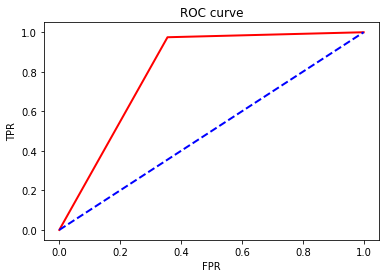

0.877724915187282


In [0]:
###Confusion matrix with sklearn
from sklearn.metrics import roc_curve, roc_auc_score

##Computing false and true positive rates
fpr, tpr,_= roc_curve(y_test, y_pred, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()

##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print(roc_auc_score(logisticRegr.predict(x_test), y_test))

In [0]:
counter = 0
for pred, true, in zip(y_pred, y_test):
  if pred == False and true == True:
    print("False: " + labels_d[counter] + " and " + labels_f[counter])
  
  if counter == 100000:
    break
  
  counter = counter + 1

### Get True Predictions as List

In [0]:
true_pred_list = []
for counter in range(259024):
  if y_val[counter] == True and y_pred[counter] == True:
    true_pred_list.append(str(x_val.iloc[counter].Director) + "," + str(x_val.iloc[counter].Cast))

In [0]:
with open('true_pred_list.txt', 'w') as f:
    for item in true_pred_list:
        f.write("%s\n" % item)

# MODEL 1

**Note:** We didn't use this in our paper.

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(3,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [0]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
hist = model.fit(x_train, y_train,
          batch_size=32, epochs=3,
          validation_data=(x_val, y_val))

In [0]:
model.evaluate(x_test, y_test)[1]

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [0]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# MODEL 2

**Note:** We didn't use this in our paper.

In [0]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(3,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(x_train, y_train,
          batch_size=32, epochs=3,
          validation_data=(x_val, y_val))

In [0]:
model_2.evaluate(x_test, y_test)[1]

In [0]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [0]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# MODEL 3

**Note:** We didn't use this in our paper.

In [0]:
from keras.layers import Dropout
from keras import regularizers

In [0]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(3,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [0]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(x_train, y_train,
          batch_size=32, epochs=3,
          validation_data=(x_val, y_val))

In [0]:
model_3.evaluate(x_test, y_test)[1]

In [0]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [0]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# RANDOM FOREST REGRESSION

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(criterion='mae', n_estimators=100, random_state=1)
regressor.fit(x_train, y_train)
y_predicted = regressor.predict(x_test)

from sklearn.metrics import r2_score
rsquared = r2_score(y_test, y_predicted)

rsquared